File Requirements:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Acquistion Data

In [3]:
# control variables
ctrl_spend = 1010476
ctrl_pop = 20014153
ctrl_click = 200140
ctrl_conv = 19815

# test variables
test_spend = 1020581
test_pop = 20214295
test_click = 208206
test_conv = 23007

# conversion by segment
ctrl_a = 9906
ctrl_b = 9909
test_a = 10504
test_b = 12503

## Profitability Assumptions

In [4]:
def calculate_interchange(purchase_amount):
    interchange_rate = 0.015  # 1.5% interchange rate
    interchange_amount = purchase_amount * interchange_rate
    return interchange_amount

In [5]:
def calculate_cogs(purchase_amount):
    cogs_rate = 0.0105  # 1.05% interchange rate
    cogs = purchase_amount * cogs_rate
    return cogs

In [6]:
def calculate_tracker_cost(row, months,total_users):
    month_cost = 5  # $5 monthly cost per member
    tracker_cost = row[total_users] * month_cost * row[months]
    return tracker_cost

## Performance Table

In [7]:
df = pd.read_csv('Performance.csv')

# Analysis

## Acquisition Funnel

Control Group

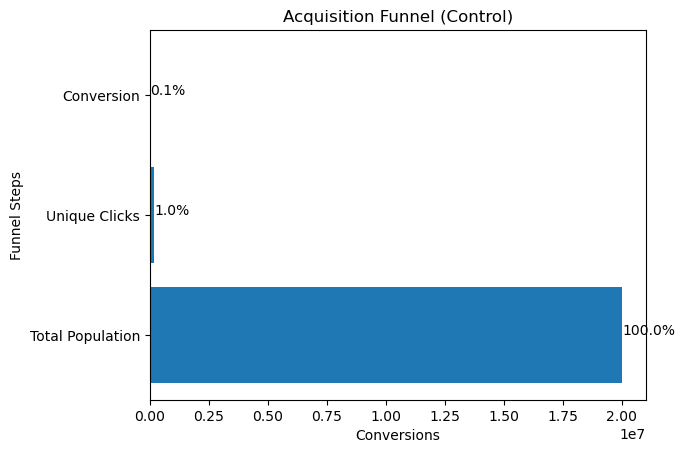

click rate is: 0.9999923554096943
conversion rate is: 0.09900493915480711


In [8]:
# Define the funnel steps and their corresponding values
funnel_steps_ctrl = ['Total Population', 'Unique Clicks', 'Conversion']
conversion_values_ctrl = [ctrl_pop, ctrl_click, ctrl_conv]

# Calculate the conversion rate for each step
conversion_rate_ctrl = [conversion_values_ctrl[i] / conversion_values_ctrl[0] * 100 for i in range(len(conversion_values_ctrl))]

# Plotting the funnel visualization
fig, ax = plt.subplots()

# Draw the funnel
ax.barh(funnel_steps_ctrl, conversion_values_ctrl)

# Add labels and title
ax.set_xlabel('Conversions')
ax.set_ylabel('Funnel Steps')
ax.set_title('Acquisition Funnel (Control)')

# Display the conversion rate as percentages on the bars
for i, v in enumerate(conversion_values_ctrl):
    ax.text(v + 10, i, f'{conversion_rate_ctrl[i]:.1f}%', color='black')

# Show the plot
plt.show()

#calculate conversion rates
click_rate_ctrl = (ctrl_click/ctrl_pop) * 100
conv_rate_ctrl = (ctrl_conv/ctrl_pop) * 100

print(f"click rate is: {click_rate_ctrl}")
print(f"conversion rate is: {conv_rate_ctrl}")


Test Group

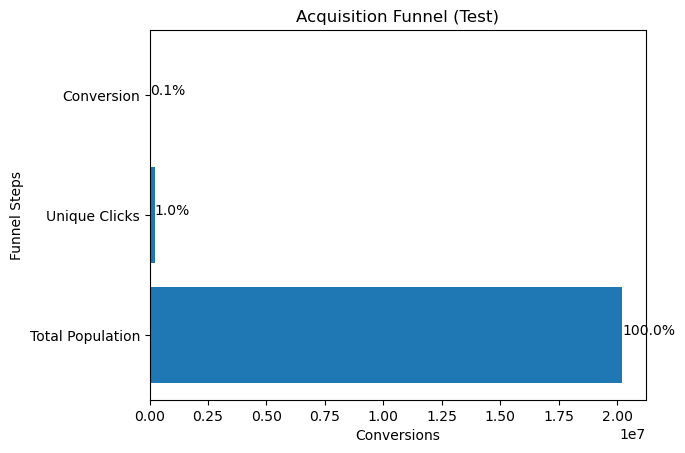

click rate is: 1.0299938731476908
conversion rate is: 0.11381549542044381


In [9]:
funnel_steps_test = ['Total Population', 'Unique Clicks', 'Conversion']
conversion_values_test = [test_pop, test_click, test_conv]

conversion_rate_test = [conversion_values_test[i] / conversion_values_test[0] * 100 for i in range(len(conversion_values_test))]

fig, ax = plt.subplots()

ax.barh(funnel_steps_test, conversion_values_test)

ax.set_xlabel('Conversions')
ax.set_ylabel('Funnel Steps')
ax.set_title('Acquisition Funnel (Test)')

for i, v in enumerate(conversion_values_test):
    ax.text(v + 10, i, f'{conversion_rate_test[i]:.1f}%', color='black')

plt.show()

click_rate_test = (test_click/test_pop) * 100
conv_rate_test = (test_conv/test_pop) * 100

print(f"click rate is: {click_rate_test}")
print(f"conversion rate is: {conv_rate_test}")

Cost per Conversion (CAC)

In [10]:
# CAC for Control
ctrl_cac = ctrl_spend/ctrl_conv
# CAC per segement
ctrl_cac_a = (ctrl_spend/2)/ctrl_a
ctrl_cac_b = (ctrl_spend/2)/ctrl_b

print(ctrl_cac)
print(ctrl_cac_a)
print(ctrl_cac_b)

50.99550845319202
51.00323036543509
50.987788878797055


In [11]:
# CAC for Test
test_cac = test_spend/test_conv
# CAC per segement
test_cac_a = (test_spend/2)/test_a
test_cac_b = (test_spend/2)/test_b

print(test_cac)
print(test_cac_a)
print(test_cac_b)

44.35958621289173
48.58058834729627
40.81344477325442


## Profitability

ROI Calculations

In [12]:
# adding interchange, COGS and tracker cost to the dataframe

df['Interchange Rate'] = df['Total Purchase Dollars'].apply(calculate_interchange)

df['COGS'] = df['Total Purchase Dollars'].apply(calculate_cogs)

df['Tracker Cost'] = df.apply(lambda row: calculate_tracker_cost(row, 'Months Since Conversion', 'Spend Tracker Active User Count'), axis=1)

df['ROI'] = df['Interchange Rate'] - df['COGS'] - df['Tracker Cost']

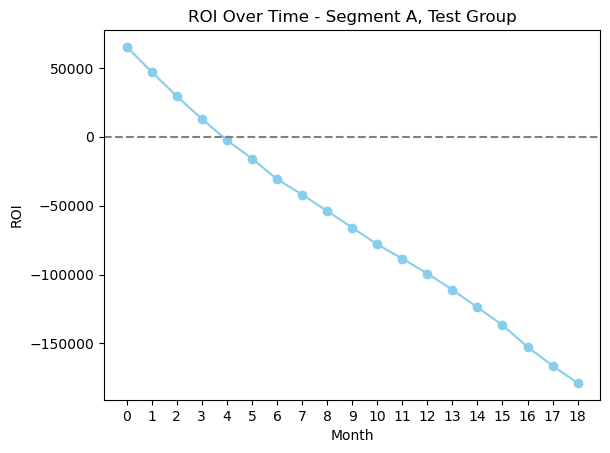

In [13]:
# Filter the DataFrame by 'Segment' and 'Test Group' columns
filtered_df_a = df[(df['Segment'] == 'Segment A') & (df['Test Group'] == 'Test')]

# Plotting the ROI over time for 'Segment A' and 'Test Group Test'
plt.plot(filtered_df_a['Months Since Conversion'], filtered_df_a['ROI'], marker='o', linestyle='-', color='skyblue')

# Customize the plot
plt.xlabel('Month')
plt.ylabel('ROI')
plt.title('ROI Over Time - Segment A, Test Group')

# Add a line at the 0 mark for revenue
plt.axhline(y=0, color='gray', linestyle='--')

# Set the x-axis ticks to go by increments of 1
plt.xticks(range(len(filtered_df_a['Months Since Conversion'])), filtered_df_a['Months Since Conversion'])

# Show the plot
plt.show()


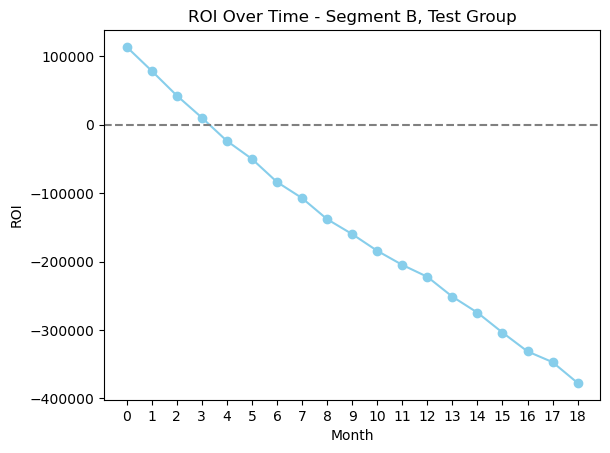

In [14]:
filtered_df_b = df[(df['Segment'] == 'Segment B') & (df['Test Group'] == 'Test')]

plt.plot(filtered_df_b['Months Since Conversion'], filtered_df_b['ROI'], marker='o', linestyle='-', color='skyblue')

plt.xlabel('Month')
plt.ylabel('ROI')
plt.title('ROI Over Time - Segment B, Test Group')

plt.axhline(y=0, color='gray', linestyle='--')

plt.xticks(range(len(filtered_df_b['Months Since Conversion'])), filtered_df_b['Months Since Conversion'])

plt.show()


LTV Calculations

In [23]:
def average_purchase_value(total_revenue, total_customers):
    apv = total_revenue/total_customers
    return apv

In [16]:
def churn_rate(first_customer, last_customer):
    churn = (first_customer - last_customer)/first_customer
    return churn

In [48]:
def lifetime_value(average_purchase_value, churn_rate):
    ltv = average_purchase_value/churn_rate
    return ltv

In [27]:
# average purchase value for each test segment

apv_a = average_purchase_value(sum(filtered_df_a['Interchange Rate']), sum(filtered_df_a['Spend Tracker Active User Count']))
print(apv_a)

apv_b = average_purchase_value(sum(filtered_df_b['Interchange Rate']), sum(filtered_df_b['Spend Tracker Active User Count']))
print(apv_b)

61.88035138306621
53.21474127539703


In [44]:
# creating start and end customer counts
start_customer_a = filtered_df_a.loc[filtered_df_a['Months Since Conversion'] == 0, 'Spend Tracker Active User Count'].item()
end_customer_a = filtered_df_a.loc[filtered_df_a['Months Since Conversion'] == 18, 'Spend Tracker Active User Count'].item()

start_customer_b = filtered_df_b.loc[filtered_df_b['Months Since Conversion'] == 0, 'Spend Tracker Active User Count'].item()
end_customer_b = filtered_df_b.loc[filtered_df_b['Months Since Conversion'] == 18, 'Spend Tracker Active User Count'].item()

3214
2449
6704
5038


In [45]:
# churn rate for each test segment
churn_a = churn_rate(start_customer_a,end_customer_a)
print(churn_a)

churn_b = churn_rate(start_customer_b,end_customer_b)
print(churn_b)

0.23802115743621655
0.24850835322195705


In [49]:
# calculating LTV for each test segment

ltv_a = lifetime_value(apv_a,churn_a)
print(ltv_a)

ltv_b = lifetime_value(apv_b,churn_b)
print(ltv_b)

259.9783651570913
214.13662995814028


In [50]:
# ltv to cac ratio
ltv_cac_a = ltv_a/test_cac_a
ltv_cac_b = ltv_b/test_cac_a

print(ltv_cac_a)
print(ltv_cac_b)

5.351486550523842
4.407864071700934
